# Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import uniform

## Task 1

### Variables

In [2]:
lamArr = [0.5, 1.0, 1.5, 2.0, 2.5]
numOf = 10000
alpha = 0.05
numBins=50

### Define Functions

In [3]:
def xsquareExpTest(rndNumbers, numBins, alpha, lam, xMax=10):
    oFrequencies = np.histogram(rndNumbers, bins=numBins, density=True)[0]
    x = np.linspace(0, xMax, 50)
    eFrequency = expon.pdf(x, scale=1/lam)
    xsqrStats = np.sum((oFrequencies - eFrequency) ** 2 / eFrequency)
    freedomDeg = numBins - 1
    xsqrCrit = chi2.ppf(1 - alpha, freedomDeg)
    return xsqrStats, xsqrCrit

### Model Initialization

λ is 0.5:
Average: 2.003025717002521
Dispersion: 3.9467570518567654
XSquare: [0.026103312952474554, 66.3386488629688]
Distribution Match


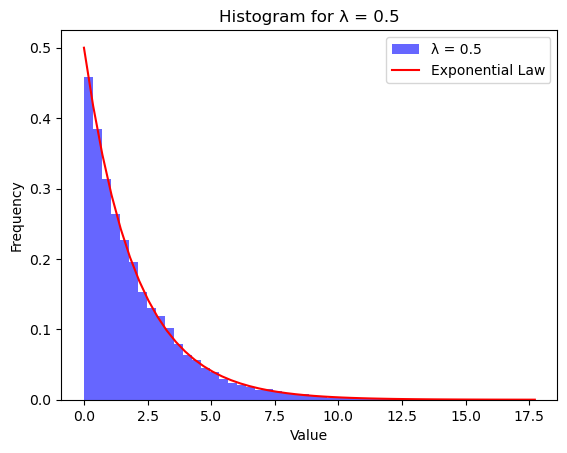

λ is 1.0:
Average: 0.9824338502953135
Dispersion: 0.9488912509752799
XSquare: [0.05158253814443486, 66.3386488629688]
Distribution Match


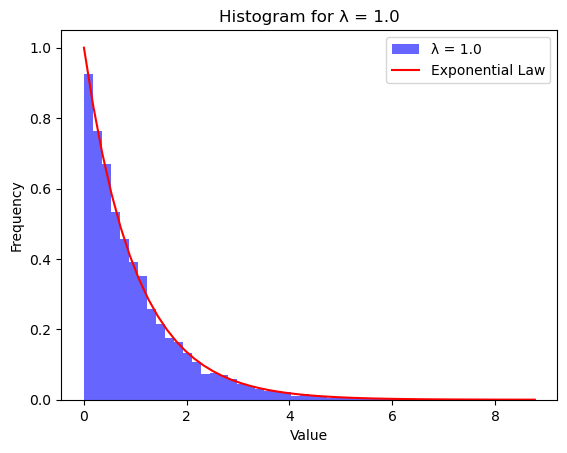

λ is 1.5:
Average: 0.6617999471738771
Dispersion: 0.4237340732853205
XSquare: [0.09658549594648673, 66.3386488629688]
Distribution Match


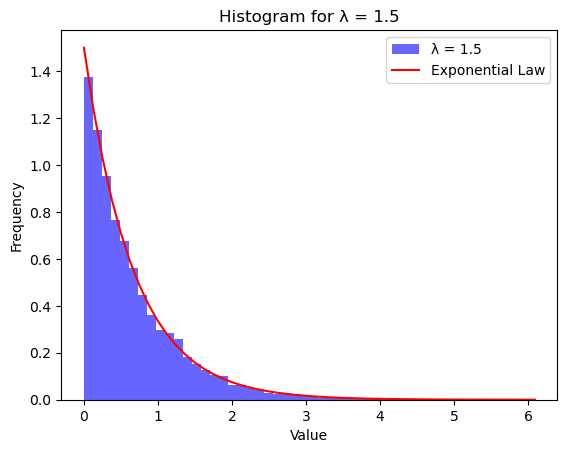

λ is 2.0:
Average: 0.4961096902688019
Dispersion: 0.24419427721359838
XSquare: [0.11611989504556777, 66.3386488629688]
Distribution Match


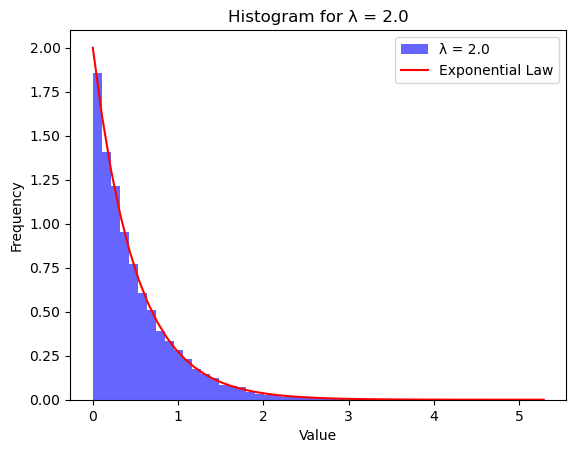

λ is 2.5:
Average: 0.39089047791893183
Dispersion: 0.1571489368582861
XSquare: [0.14013022006806877, 66.3386488629688]
Distribution Match


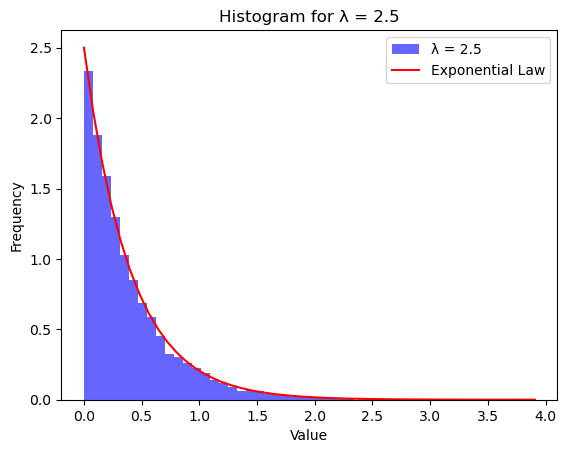

In [16]:
for lam in lamArr:
    rndNumbers = np.random.rand(numOf)
    rndENumbers = - (1 / lam) * np.log(rndNumbers)
    plt.hist(rndENumbers, bins=numBins, density=True, alpha=0.6, label=f'λ = {lam}', color='blue')
    xMax = np.max(rndENumbers)
    x = np.linspace(0, xMax, 50)
    expLaw = expon.pdf(x, scale=1/lam)
    plt.plot(x, expLaw, 'r-', label='Exponential Law')
    average = np.mean(rndENumbers)
    dispersion = np.var(rndENumbers)
    xsqrStats, xsqrCrit = xsquareExpTest(rndENumbers, numBins, alpha, lam, xMax)

    print(f'λ is {lam}:')
    print(f'Average: {average}')
    print(f'Dispersion: {dispersion}')
    print(f'XSquare: [{xsqrStats}, {xsqrCrit}]')
        
    if xsqrCrit >= xsqrStats:
        print('Distribution Match')
    else:
        print('Distibution Doesnt Match')
        
    plt.legend()
    plt.title(f'Histogram for λ = {lam}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

## Task 2

### Variables

In [5]:
numOf = 10000
aArr = [0, 2, 4] 
omegaArr = [1, 2, 3] 
numBins = 30
alpha = 0.05

### Define Functions

In [6]:
def xsquareTest(rndNumbers, numBins, alpha):
    oFrequencies = np.histogram(rndNumbers, bins=numBins, density=True)[0]
    eFrequency = norm.pdf(np.linspace(-3, 3, numBins))
    xsqrStats = np.sum((oFrequencies - eFrequency) ** 2 / eFrequency)
    freedomDeg = numBins - 1
    xsqrCrit = chi2.ppf(1 - alpha, freedomDeg)
    return xsqrStats, xsqrCrit

def calculateUi():
    xiArr = np.random.rand(12)
    return np.sum(xiArr - 6)

def generateXArr(omega, a):
    mu = np.array([calculateUi() for _ in range(numOf)])
    return omega * mu + a

### Model Initialization

Omega is 1 and A is 1220703125
XSquare: [0.19868221557052304, 66.3386488629688]
Distribution Match


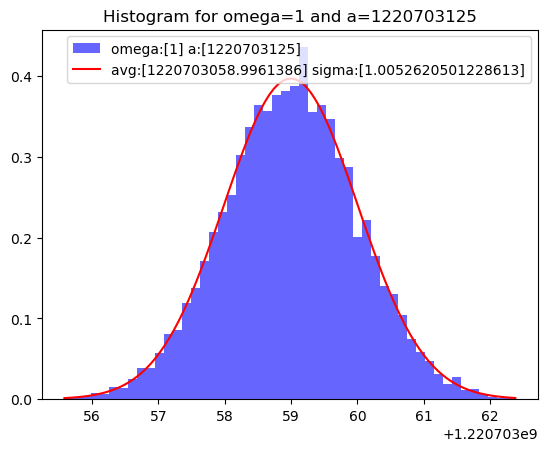

Omega is 2 and A is 1220703125
XSquare: [3.4767880740467527, 66.3386488629688]
Distribution Match


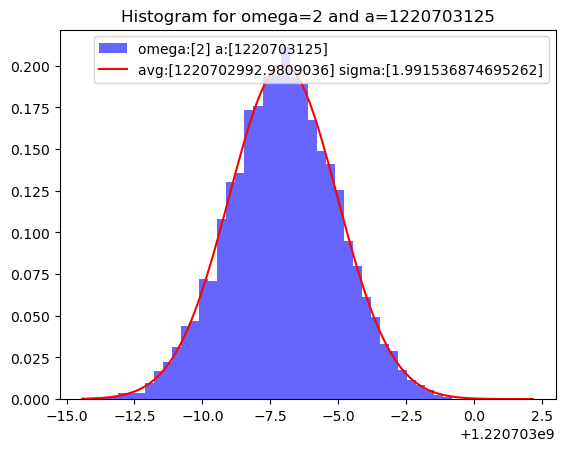

Omega is 3 and A is 1220703125
XSquare: [4.188633101471796, 66.3386488629688]
Distribution Match


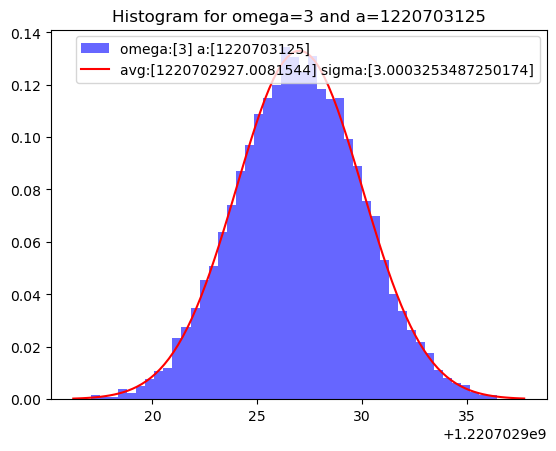

Omega is 1 and A is 3125
XSquare: [0.3892141954323014, 66.3386488629688]
Distribution Match


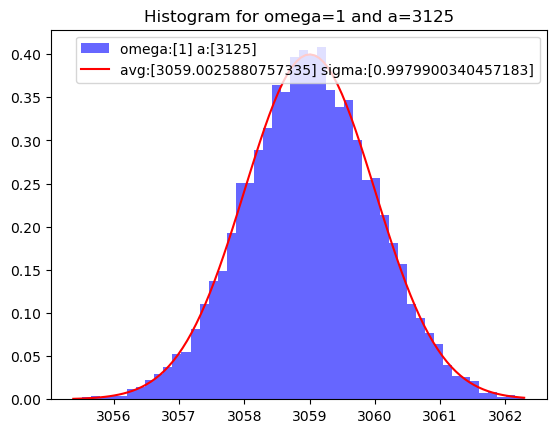

Omega is 2 and A is 3125
XSquare: [2.7011597618000716, 66.3386488629688]
Distribution Match


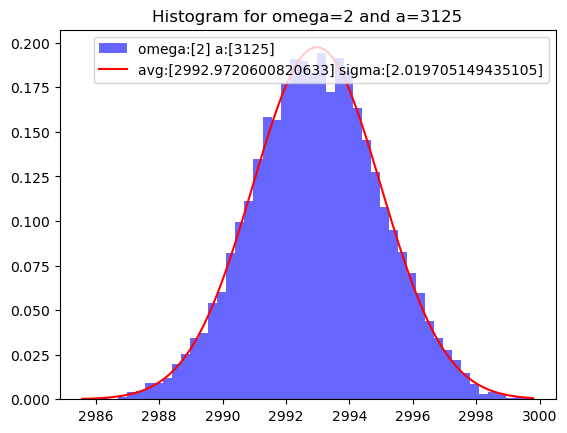

Omega is 3 and A is 3125
XSquare: [4.360452998546192, 66.3386488629688]
Distribution Match


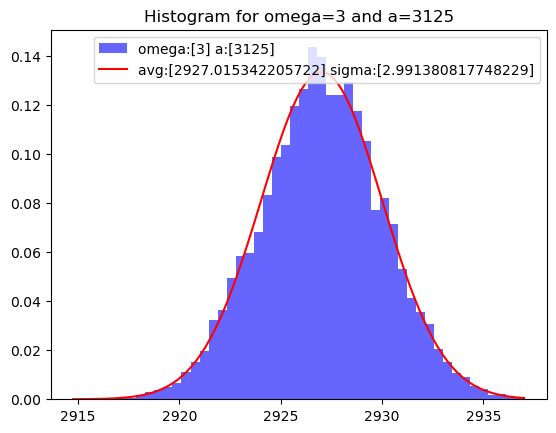

Omega is 1 and A is 1048576
XSquare: [0.4098227087748547, 66.3386488629688]
Distribution Match


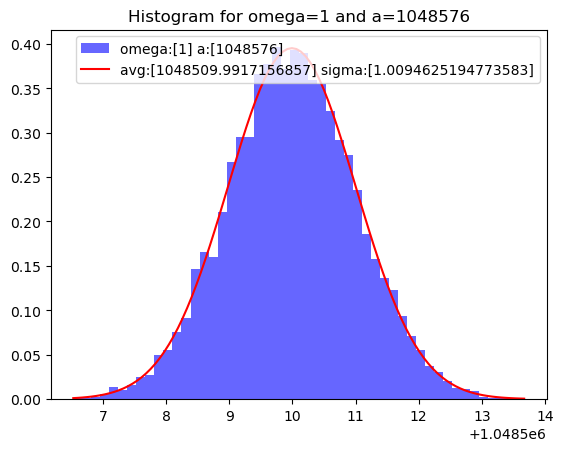

Omega is 2 and A is 1048576
XSquare: [2.6688120894857295, 66.3386488629688]
Distribution Match


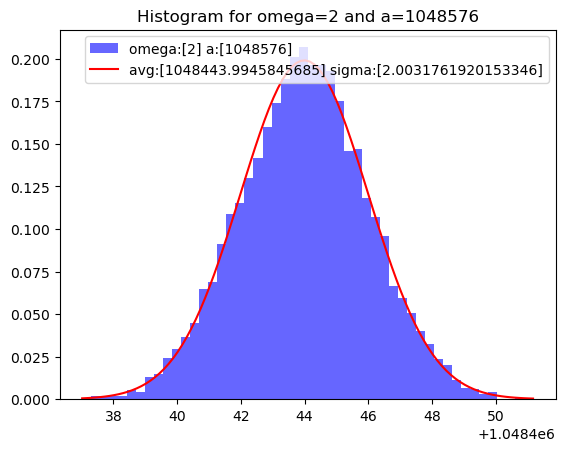

Omega is 3 and A is 1048576
XSquare: [3.9908519334030315, 66.3386488629688]
Distribution Match


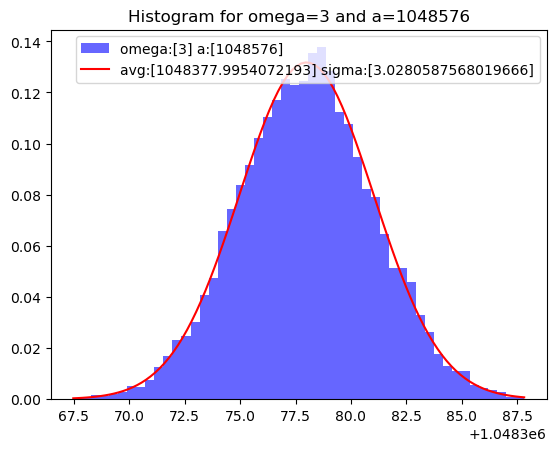

In [13]:
for a in aArr:
    for omega in omegaArr:
        xArr = generateXArr(omega, a)
        average = np.mean(xArr)
        dispersion = np.var(xArr)
        xRange = np.linspace(min(xArr), max(xArr), 100)
        normal = norm.pdf(xRange, loc=average, scale=np.sqrt(dispersion))
        plt.hist(xArr, bins=numBins, density=True, alpha=0.6, label=f'omega:[{omega}] a:[{a}]', color='blue')
        plt.plot(xRange, normal, 'r-', label=f'avg:[{average}] sigma:[{np.sqrt(dispersion)}]')
        xsqrStats, xsqrCrit = xsquareTest(xArr, numBins, alpha)
    
        print(f'Omega is {omega} and A is {a}')
        print(f'XSquare: [{xsqrStats}, {xsqrCrit}]')
        
        if xsqrCrit >= xsqrStats:
            print('Distribution Match')
        else:
            print('Distibution Doesnt Match')
        
        plt.legend()
        plt.title(f'Histogram for omega={omega} and a={a}')
        plt.show()

## Task 3

### Variables

In [8]:
numOf = 10000
aArr = [5**13, 5**5, 2**20]
cArr = [2**31, 2**13, 5**20]
numBins = 50
alpha = 0.05 

### Define Functions

In [9]:
def generateNumbers(a, c, numOf):
    z = np.zeros(numOf)
    x = np.zeros(numOf)
    z[0] = 42  # Початкове значення z₀ (можна вибрати інше)
    
    for i in range(1, numOf):
        z[i] = (a * z[i-1]) % c
        x[i] = (z[i] + c) / c
        
    return x

def xsquareUniTest(rndNumbers, numBins, alpha):
    oFrequencies = np.histogram(rndNumbers, bins=numBins, density=True)[0]
    eFrequency = uniform.pdf(np.linspace(0, 1, numBins))
    xsqrStats = np.sum((oFrequencies - eFrequency) ** 2 / eFrequency)
    
    freedomDeg = numBins - 1
    xsqrCrit = chi2.ppf(1 - alpha, freedomDeg)
    
    return xsqrStats, xsqrCrit

### Model Initialization

a is 1220703125 and c is 2147483648
Average: 1.498591324453894
Dispersion: 0.08325731073410489
XSquare: [25.04796761240013, 66.3386488629688]
Distribution Match


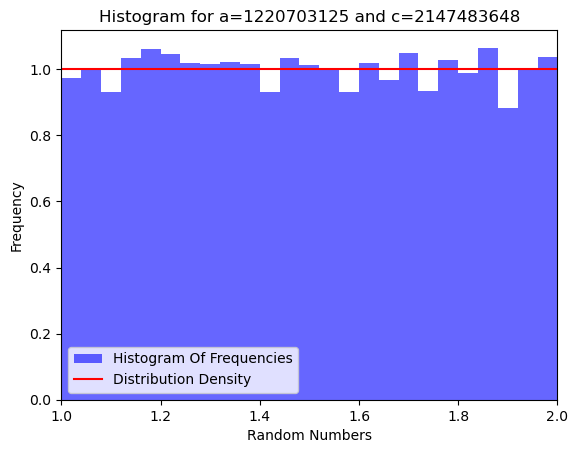

a is 1220703125 and c is 8192
Average: 1.5002819091796875
Dispersion: 0.08346876374291837
XSquare: [24.996225588806134, 66.3386488629688]
Distribution Match


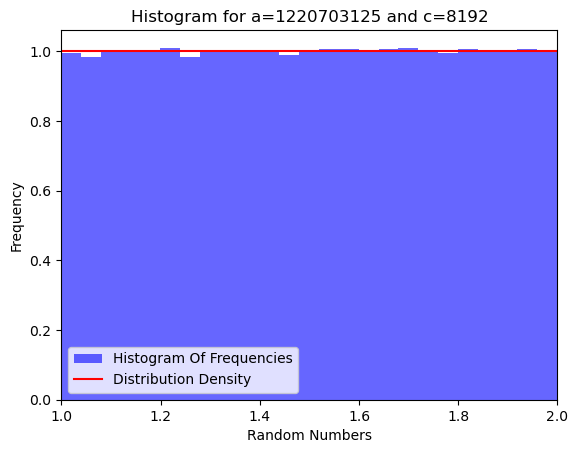

a is 1220703125 and c is 95367431640625
Average: 1.5015676269593767
Dispersion: 0.08465460297960696
XSquare: [25.051312500000872, 66.3386488629688]
Distribution Match


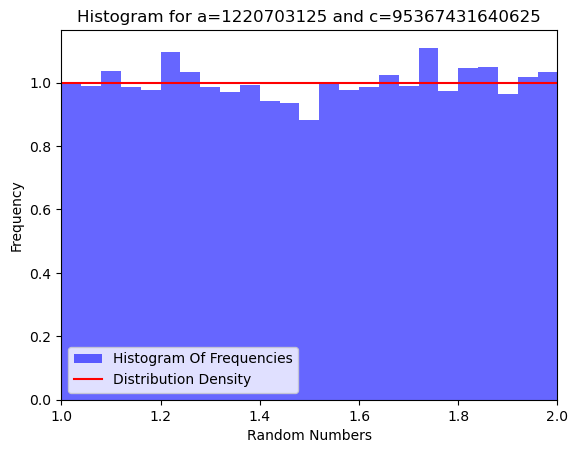

a is 3125 and c is 2147483648
Average: 1.4983092040087096
Dispersion: 0.0845645237026068
XSquare: [25.04526420574139, 66.3386488629688]
Distribution Match


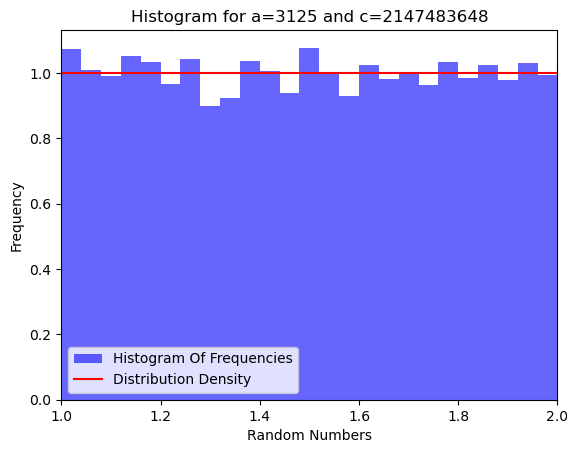

a is 3125 and c is 8192
Average: 1.4992756591796874
Dispersion: 0.08364858893182218
XSquare: [24.99636318956949, 66.3386488629688]
Distribution Match


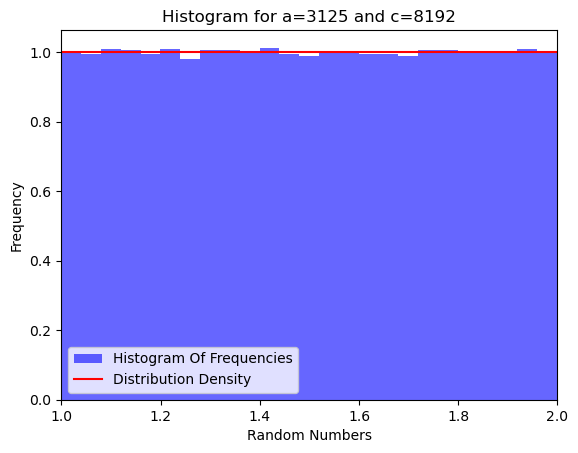

a is 3125 and c is 95367431640625
Average: 0.9999013444302176
Dispersion: 0.00010000833044040062
XSquare: [2384.970274923386, 66.3386488629688]
Distibution Doesnt Match


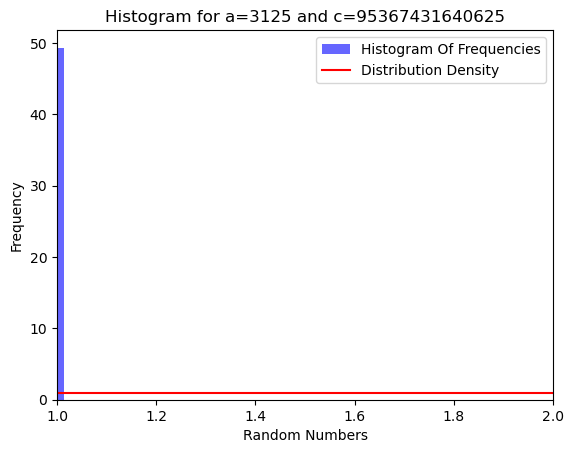

a is 1048576 and c is 2147483648
Average: 0.99990205078125
Dispersion: 0.00010003246298789976
XSquare: [2351.580624332232, 66.3386488629688]
Distibution Doesnt Match


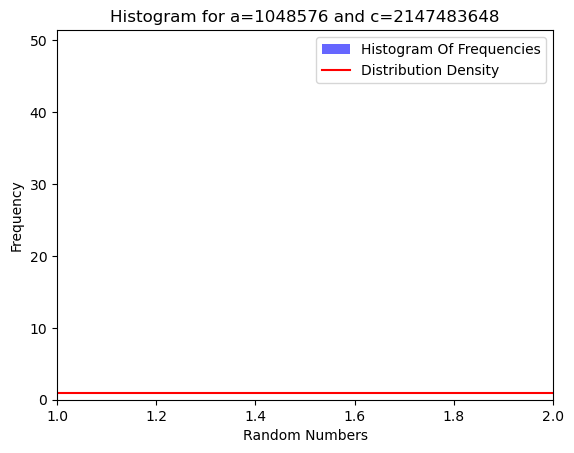

a is 1048576 and c is 8192
Average: 0.9999
Dispersion: 9.999000000000009e-05
XSquare: [2449.5000499999956, 66.3386488629688]
Distibution Doesnt Match


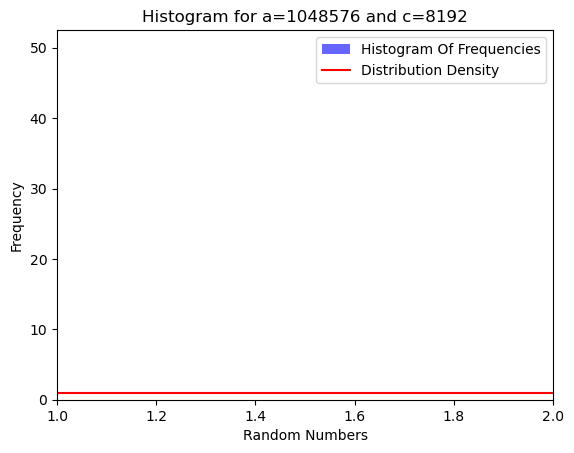

a is 1048576 and c is 95367431640625
Average: 1.5032066991055484
Dispersion: 0.08385927169530784
XSquare: [25.040225224601464, 66.3386488629688]
Distribution Match


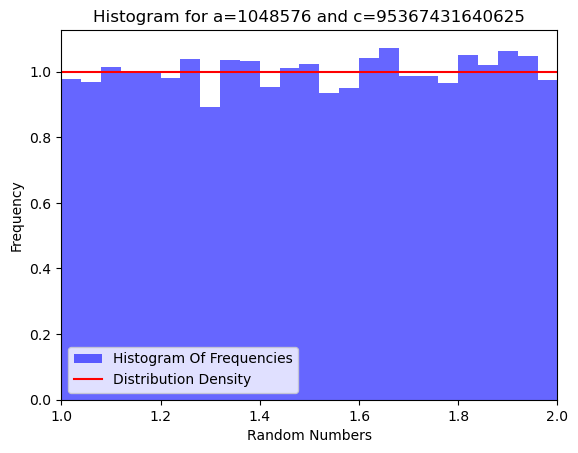

In [19]:
for a in aArr:
    for c in cArr:
        rndNumbers = generateNumbers(a, c, numOf)
        plt.hist(rndNumbers, bins=numBins, density=True, alpha=0.6, color='blue', label='Histogram Of Frequencies')
        average = np.mean(rndNumbers)
        dispersion = np.var(rndNumbers)
        xsqrStats, xsqrCrit = xsquareUniTest(rndNumbers, numBins, alpha)
        uni = uniform.pdf(np.linspace(0, 1, numBins))
        plt.plot(np.linspace(1, 2, numBins), uni, 'r-', label='Distribution Density')

        print(f'a is {a} and c is {c}')
        print(f'Average: {average}')
        print(f'Dispersion: {dispersion}')
        print(f'XSquare: [{xsqrStats}, {xsqrCrit}]')
        
        if xsqrCrit >= xsqrStats:
            print('Distribution Match')
        else:
            print('Distibution Doesnt Match')
        
        plt.xlim(1, 2)
        plt.legend()
        plt.xlabel('Random Numbers')
        plt.ylabel('Frequency')
        plt.title(f'Histogram for a={a} and c={c}')
        plt.show()